# PARA-ATM demonstration

This demonstration will illustrate:
1. Using PARA-ATM to read in trajectory data from an IFF file
2. Inspecting and plotting the trajectory data
3. Using PARA-ATM to interface with the GNATS simulation

## Working with trajectory data

First, we will use PARA-ATM to read in flight trajectory data from an IFF format file:

In [1]:
from paraatm.io.iff import read_iff_file
data = read_iff_file('IFF_SFO_ASDEX_ABC123.csv')

Let's take a look at what information is available in the data that we read:

In [2]:
print('Number of trajectory points:', len(data))
print('Columns:\n', data.columns)

Number of trajectory points: 723
Columns:
 Index(['recType', 'time', 'fltKey', 'bcnCode', 'cid', 'Source', 'msgType',
       'callsign', 'recTypeCat', 'latitude', 'longitude', 'altitude',
       'significance', 'coord1Accur', 'coord2Accur', 'altAccur', 'tas',
       'heading', 'rocd', 'altQualifier', 'altIndicator', 'trackPtStatus',
       'leaderDir', 'scratchPad', 'msawInhibitInd', 'assignedAltString',
       'controllingFac', 'controllingSeg', 'receivingFac', 'receivingSec',
       'activeContr', 'primaryContr', 'kybrdSubset', 'kybrdSymbol', 'adsCode',
       'opsType', 'airportCode', 'trackNumber', 'tptReturnType', 'modeSCode'],
      dtype='object')


Let's create a simple plot of two of the variables from the data set:

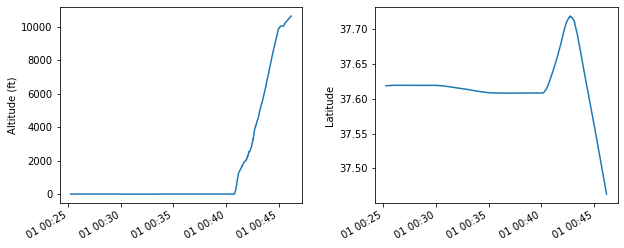

In [3]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,2, figsize=[10,4])
axes[0].plot(data['time'], data['altitude'])
axes[0].set_ylabel('Altitude (ft)')
axes[1].plot(data['time'], data['latitude'])
axes[1].set_ylabel('Latitude')
f.subplots_adjust(wspace=.3)
f.autofmt_xdate()

Now we will use PARA-ATM to make a plot of the trajectory:

In [4]:
from paraatm.plotting import plot_trajectory

plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...

## GNATS

Now we will demonstrate how to run a GNATS simulation using PARA-ATM

First, we import the user-defined simulation model:

In [5]:
from gnats_gate_to_gate import GateToGate

Now we create an instance of the simulation class:

In [6]:
sim = GateToGate()

Now, we can use PARA-ATM to automate the process of running GNATS, writing the GNATS output file, and reading it back in automatically:

In [7]:
data = sim()['trajectory']

Let's inspect the trajectory data that were generated:

In [8]:
print('Number of trajectory points:', len(data))
print('Columns:\n', data.columns)

Number of trajectory points: 218
Columns:
 Index(['time', 'latitude', 'longitude', 'altitude', 'rocd', 'tas',
       'tas_knots_ground', 'heading', 'fpa', 'status', 'callsign', 'origin',
       'destination'],
      dtype='object')


Finally, we use PARA-ATM to plot the trajectory data:

In [9]:
plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...